In [1]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [7]:
df = pd.read_json("results/multivariate/mse.json")

In [8]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=24
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [9]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [10]:
merged_df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,,
crossformer,3.606461,0.087878,0.121957,0.324467,0.219503,0.068553,0.084577
itransformer,3.626936,0.034832,0.129704,0.345239,0.273449,0.078996,0.110265
moment,2.752347,0.045100,0.242549,0.355785,0.276174,0.172010,0.245127
patchtst,3.740494,0.031071,0.127681,0.396006,0.224546,0.065345,0.088666
samformer,4.458724,0.209166,0.194170,0.605898,0.567232,0.127837,0.254198
timemixer,2.222457,0.024884,0.124169,0.356819,0.275506,0.070083,0.102729
vaformer,2.215279,0.026501,0.120829,0.327205,0.260865,0.069834,0.096052


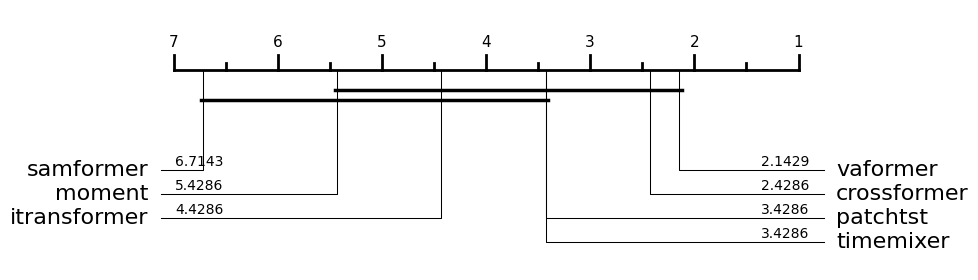

In [11]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  